<a href="https://colab.research.google.com/github/HiimanshuSherawat/Time_Series/blob/main/ACF_PACF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path=('/content/ice_cream.csv')

In [3]:
df_ice_cream = pd.read_csv(path)

In [6]:
df_ice_cream.head(10)

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636
5,1972-06-01,100.5960
6,1972-07-01,100.1263
7,1972-08-01,96.3607
8,1972-09-01,85.8007
9,1972-10-01,70.3934


In [7]:
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [8]:
df_ice_cream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        577 non-null    object 
 1   production  577 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.1+ KB


In [9]:
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [10]:
df_ice_cream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        577 non-null    datetime64[ns]
 1   production  577 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.1 KB


In [11]:
df_ice_cream.set_index('date', inplace=True)

In [12]:
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [13]:
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


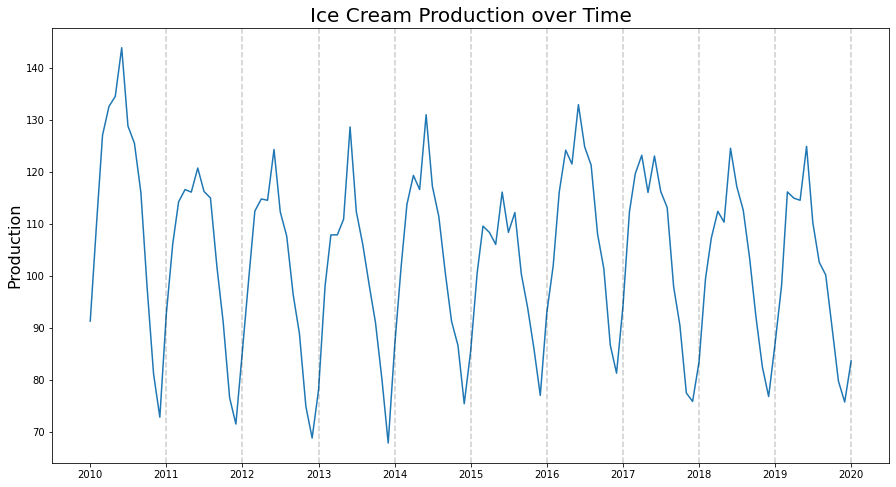

In [16]:
plt.figure(figsize=(15,8))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [17]:
#ACF

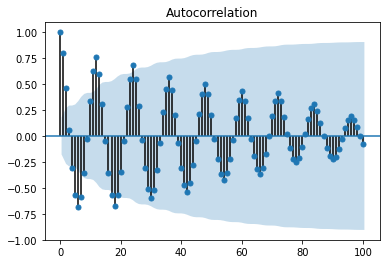

In [22]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

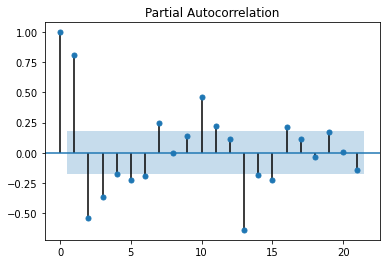

In [23]:
#PACF
pacf_plot = plot_pacf(df_ice_cream.production)

In [26]:
import yfinance as yf
tickerSymbol = 'SPY'
tickerData = yf.Ticker(tickerSymbol)

In [25]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 6.6 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [27]:
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2020-1-1')

In [28]:
tickerDf = tickerDf[['Close']]

In [29]:
tickerDf.head()

,Close
Date,
2015-01-02,180.342667
2015-01-05,177.085754
2015-01-06,175.417755
2015-01-07,177.603683
2015-01-08,180.755249


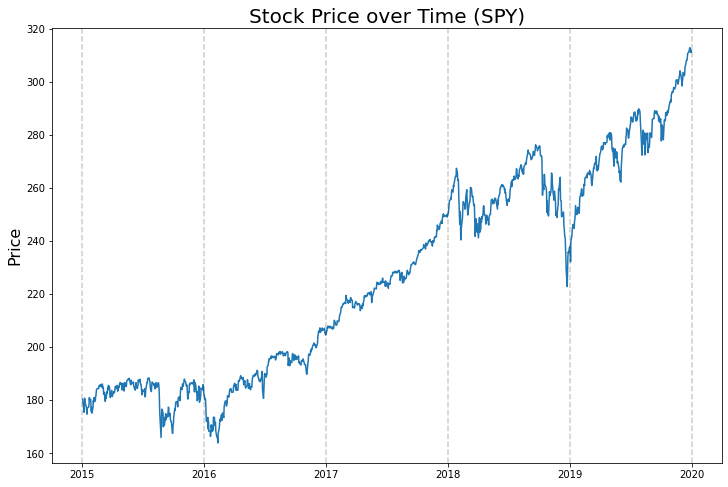

In [31]:
plt.figure(figsize=(12,8))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [32]:
# Stationarity 
#take first difference
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [33]:
tickerDf['FirstDifference'] = first_diffs

In [34]:
tickerDf.head()

,Close,FirstDifference
Date,,
2015-01-02,180.342667,-3.256912
2015-01-05,177.085754,-1.667999
2015-01-06,175.417755,2.185928
2015-01-07,177.603683,3.151566
2015-01-08,180.755249,-1.448502


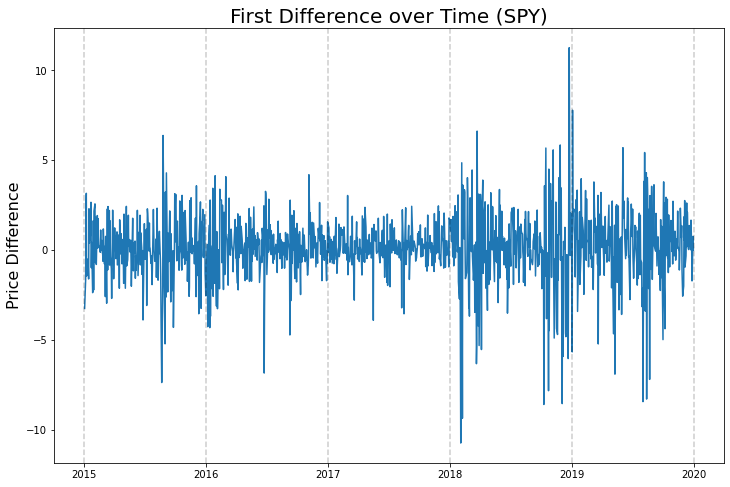

In [35]:
plt.figure(figsize=(12,8))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

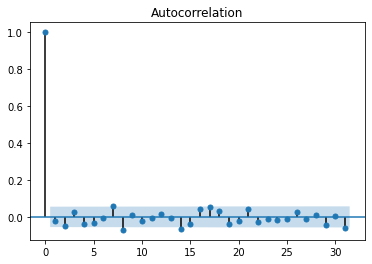

In [36]:
acf_plot = plot_acf(tickerDf.FirstDifference)

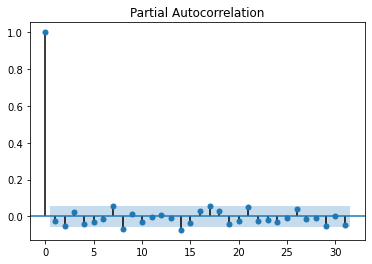

In [37]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)

In [ ]:
# Both ACF & PACF doesn't tell much